In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import re
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sudharsangopalakrishnan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
train = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv')
valid = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv')
test = pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv')

In [5]:
data = pd.concat([train, valid, test])
data.set_index(np.array([i for i in range(50000)]), inplace=True)

In [6]:
# Plotting the distribution for dataset.
ax = data.groupby('label').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(data['text']), list(data['label'])

In [7]:
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text

data['text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")
data

In [8]:
data['text'] = data['text'].str.replace("[^a-zA-Z#]", " ")
data

In [9]:
data['text'] = data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data

In [10]:
tokenized_tweet_data = data['text'].apply(lambda x: x.split())
tokenized_tweet_data

In [11]:
for i in range(len(tokenized_tweet_data)):
    tokenized_tweet_data[i] = ' '.join(tokenized_tweet_data[i])
data['text'] = tokenized_tweet_data

In [12]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [13]:
all_words_positive = ' '.join(text for text in train['text'][train['label']==1])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

In [14]:
# Size of the image generated 
plt.figure(figsize=(10,10))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Positive Review Common Text')
plt.axis('off')
plt.savefig('Movie_Positive_Review_Common_Text.png')
plt.show()

In [15]:
all_words_negative = ' '.join(text for text in train['text'][train['label']==0])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

In [16]:
# Size of the image generated 
plt.figure(figsize=(10,10))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Negative Review Common Text')
plt.axis('off')
plt.savefig('Movie_Negative_Review_Common_Text.png')
plt.show()

In [17]:
def view_common_words(train):
    pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
    plt.figure(figsize=(20,6))
    pos_freq.plot(50,cumulative=False,title='IMDb Positive Review Common Text', color='blue')
    plt.gcf()
    plt.savefig('Movie_Positive_Common_Text_Graph.png')
    plt.show()

    neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
    plt.figure(figsize=(20,6))
    neg_freq.plot(50,cumulative=False,title='IMDb Negative Review Common Text',color='red')
    plt.gcf()
    plt.savefig('Movie_Negative_Common_Text_Graph.png')
    plt.show()

In [18]:
view_common_words(data)

In [38]:
from nltk.stem import WordNetLemmatizer

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], sentiment,
                                                    test_size = 0.1, random_state = 0)
print(f'Data Split done.')

In [40]:
def prepare_data(X_train, X_test):
    #Tokenize the sentences
    tokenizer = Tokenizer()
    #preparing vocabulary
    tokenizer.fit_on_texts(data['text'])
    #converting text into integer sequences
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)
    #padding to prepare sequences of same length
    X_train=pad_sequences(X_train,maxlen=120)
    X_test=pad_sequences(X_test,maxlen=120)

    size_of_vocabulary = len(tokenizer.word_index)+1
    print("Vocabulary Size: " + str(size_of_vocabulary))

    return X_train, X_test, size_of_vocabulary

In [41]:
X_train, X_test, size_of_vocabulary = prepare_data(X_train, X_test)

In [108]:
from keras.layers import *
from keras.models import *
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [109]:
def build_BiLSTM(size_of_vocabulary):
    model = Sequential()
    #embedding layer
    model.add(Embedding(size_of_vocabulary,128,input_length=120))
    #lstm layer
    model.add(Bidirectional(LSTM(64,return_sequences=True,dropout=0.2)))
    #Global Maxpooling
    model.add(GlobalMaxPooling1D())
    #Dense Layer
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation='sigmoid'))
    #Add loss function, metrics, optimizer
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    #Adding callbacks
    es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True,verbose=1)
    #summary
    return model, es, mc

In [44]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [45]:
model, es, mc = build_BiLSTM(size_of_vocabulary)
model.summary()

In [48]:
from sklearn.model_selection import KFold

n_split=10
histories = []
i = 1

for train_index,test_index in KFold(n_split).split(X):
    print("Fold {}".format(i))
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

    model, es, mc=build_BiLSTM(size_of_vocabulary)
    history=model.fit(X_train, y_train,batch_size=128,epochs=4)
    model.save('model_fold_{}.h5'.format(i))
    histories.append(history)
    
    print('Model evaluation ',model.evaluate(X_test,y_test))
    print("")
    i = i + 1

In [4]:
food_desert_data = pd.read_csv('data/food_desert_data(testing)/Food_Deserts_and_Insecurity.csv')
food_desert_data

,Unnamed: 0,user_location,date,text,hashtags,source
0,0,"Philadelphia, PA",2022-08-22 17:06:05+00:00,RT @ProtectHarvest: Food elitism is real and i...,"['agriculture', 'foodie']",Twitter for iPhone
1,1,USA,2022-08-22 17:05:11+00:00,Food elitism is real and it harms low-income f...,['agriculture'],Hootsuite Inc.
2,2,Southwind,2022-08-21 20:51:46+00:00,"RT @FoPRR: You can ship beans, flour, milk, pa...",NaN,proxPhoto
3,3,"Apache Junction, AZ",2022-08-21 20:40:47+00:00,"RT @FoPRR: You can ship beans, flour, milk, pa...",NaN,Twitter for iPad
4,4,"Eugene, OR",2022-08-21 20:28:17+00:00,"RT @FoPRR: You can ship beans, flour, milk, pa...",NaN,Twitter for Android
...,...,...,...,...,...,...
3028,3028,"Maryland, USA",2022-08-13 01:04:02+00:00,What can we do to address #hunger in #Maryland...,"['hunger', 'Maryland', 'nutritiousfood']",Buffer
3029,3029,NaN,2022-08-13 00:42:35+00:00,RT @King_Dayz70: My vision is this 👇\n\nPeace ...,"['Imagine', 'Tigray']",Twitter for iPhone
3030,3030,NaN,2022-08-13 00:38:31+00:00,RT @King_Dayz70: My vision is this 👇\n\nPeace ...,"['Imagine', 'Tigray']",Twitter for Android
3031,3031,"Pasadena, CA",2022-08-13 00:11:37+00:00,Help for free at https://t.co/dVfhZWGvBj https...,"['inequality', 'poverty', 'hunger', 'Hunger']",Twitter Web App


In [5]:
def remove_pattern(text,pattern):
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    return text
food_desert_data['text'] = np.vectorize(remove_pattern)(food_desert_data['text'], "@[\w]*")
food_desert_data['text'] = np.vectorize(remove_pattern)(food_desert_data['text'], "https[\w]*")
food_desert_data['text']

0       RT : Food elitism is real and it harms low-inc...
1       Food elitism is real and it harms low-income f...
2       RT : You can ship beans, flour, milk, pasta, v...
3       RT : You can ship beans, flour, milk, pasta, v...
4       RT : You can ship beans, flour, milk, pasta, v...
                              ...                        
3028    What can we do to address #hunger in #Maryland...
3029    RT : My vision is this 👇\n\nPeace &amp; Securi...
3030    RT : My vision is this 👇\n\nPeace &amp; Securi...
3031    Help for free at ://t.co/dVfhZWGvBj ://t.co/Qr...
3032    RT : Waving thanks to the wonderful donor who ...
Name: text, Length: 3033, dtype: object

In [6]:
food_desert_data['text'] = food_desert_data['text'].str.replace("[^a-zA-Z#]", " ")
food_desert_data['text']

/var/folders/4m/jxk5_ydd4zl7c_t8ktc70vnw0000gn/T/ipykernel_97628/271893449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  food_desert_data['text'] = food_desert_data['text'].str.replace("[^a-zA-Z#]", " ")


0       RT   Food elitism is real and it harms low inc...
1       Food elitism is real and it harms low income f...
2       RT   You can ship beans  flour  milk  pasta  v...
3       RT   You can ship beans  flour  milk  pasta  v...
4       RT   You can ship beans  flour  milk  pasta  v...
                              ...                        
3028    What can we do to address #hunger in #Maryland...
3029    RT   My vision is this    Peace  amp  Security...
3030    RT   My vision is this    Peace  amp  Security...
3031    Help for free at    t co dVfhZWGvBj    t co Qr...
3032    RT   Waving thanks to the wonderful donor who ...
Name: text, Length: 3033, dtype: object

In [7]:
food_desert_data['text'] = food_desert_data['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
food_desert_data['text']

0       Food elitism real harms income families Find m...
1       Food elitism real harms income families Find m...
2       ship beans flour milk pasta veggies peanut but...
3       ship beans flour milk pasta veggies peanut but...
4       ship beans flour milk pasta veggies peanut but...
                              ...                        
3028    What address #hunger #Maryland Establishing ri...
3029    vision this Peace Security every African first...
3030    vision this Peace Security every African first...
3031    Help free dVfhZWGvBj QroQyVvn #inequality #pov...
3032    Waving thanks wonderful donor sent oats rice p...
Name: text, Length: 3033, dtype: object

In [8]:
food_desert_data.drop_duplicates(subset='text', inplace=True)
food_desert_data.set_index(np.array([i for i in range(len(food_desert_data))]), inplace=True)
food_desert_data['text']

0       Food elitism real harms income families Find m...
1       Food elitism real harms income families Find m...
2       ship beans flour milk pasta veggies peanut but...
3       ship beans flour milk pasta veggies peanut but...
4       neighbor used part tomatoes beautiful #fooddesert
                              ...                        
1553    nothing oriole this point citizens getting the...
1554    excited about next reads #thewarofart #hunger ...
1555    What address #hunger #Maryland Establishing ri...
1556    White House #Hunger Conference centers people ...
1557    What address #hunger #Maryland Establishing ri...
Name: text, Length: 1558, dtype: object

In [9]:
location = np.array(food_desert_data['user_location'])

In [10]:
#Tokenize the sentences
tokenizer = Tokenizer()
#preparing vocabulary
tokenizer.fit_on_texts(food_desert_data['text'])
#converting text into integer sequences
processedtext = tokenizer.texts_to_sequences(food_desert_data['text'])
#padding to prepare sequences of same length
processedtext=pad_sequences(processedtext,maxlen=120)

In [11]:
from keras.models import load_model

In [12]:
model_f1 = load_model('saved_model_folds/model_fold_1.h5')
model_f2 = load_model('saved_model_folds/model_fold_2.h5')
model_f3 = load_model('saved_model_folds/model_fold_3.h5')
model_f4 = load_model('saved_model_folds/model_fold_4.h5')
model_f5 = load_model('saved_model_folds/model_fold_5.h5')
model_f6 = load_model('saved_model_folds/model_fold_6.h5')
model_f7 = load_model('saved_model_folds/model_fold_7.h5')
model_f8 = load_model('saved_model_folds/model_fold_8.h5')
model_f9 = load_model('saved_model_folds/model_fold_9.h5')
model_f10 = load_model('saved_model_folds/model_fold_10.h5')

2022-08-29 19:31:45.711881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
models = [model_f1, model_f2, model_f3, model_f4, model_f5, model_f6, model_f7, model_f8, model_f9, model_f10]

In [14]:
sentiments = np.array([np.array(model.predict(processedtext)).reshape(1558,) for model in models])

49/49 [==============================] - 2s 26ms/step


In [15]:
sum = sentiments[0]
for i in range(1, len(sentiments)):
        sum += sentiments[i]
sentiments_avg = sum/10

In [16]:
sentiments_avg

array([0.41826844, 0.76309663, 0.81185025, ..., 0.7424935 , 0.20823482,
       0.9362321 ], dtype=float32)

In [17]:
sentiment_rounded = np.array(sentiments_avg).reshape(len(sentiments_avg),)
for i in range(len(sentiments_avg)):
    sentiment_rounded[i] = int(round(sentiment_rounded[i]))

In [18]:
food = pd.DataFrame({"text": food_desert_data['text'].values, "label": sentiment_rounded}, index=np.array([i for i in range(len(food_desert_data['text']))]))

In [19]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
str().find

<function str.find>

In [37]:
all_words_positive = ' '.join(text for text in food['text'][food['label']==1])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

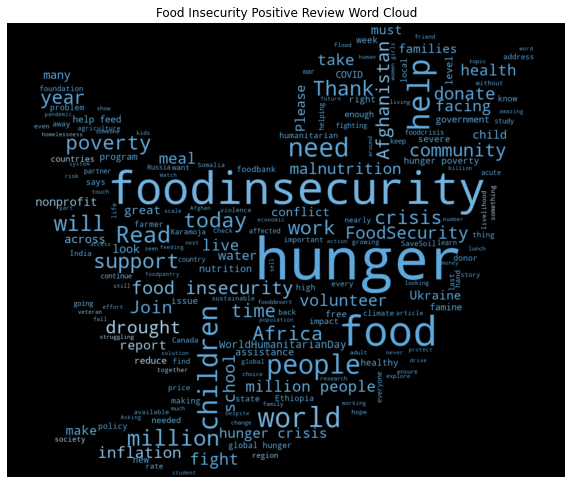

In [38]:
# Size of the image generated 
plt.figure(figsize=(10,10))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Food Insecurity Positive Review Word Cloud')
plt.axis('off')
plt.savefig('Positive_Review_Common_Text.png')
plt.show()

In [39]:
all_words_negative = ' '.join(text for text in food['text'][food['label']==0])

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

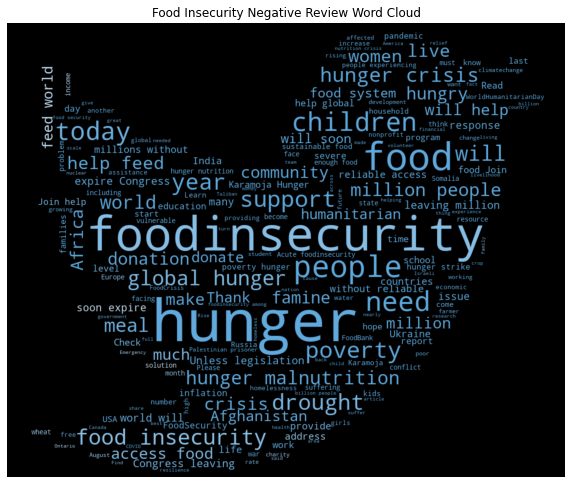

In [40]:
# Size of the image generated 
plt.figure(figsize=(10,10))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Food Insecurity Negative Review Word Cloud')
plt.axis('off')
plt.savefig('Negative_Review_Common_Text.png')
plt.show()

In [24]:
def view_common_words(train):
    pos_freq = FreqDist(' '.join(train[train['label'] == 1].text).split(' '))
    plt.figure(figsize=(20,6))
    pos_freq.plot(50,cumulative=False,title='Food Insecurity Positive Review Common Text', color='blue')
    plt.gcf()
    plt.savefig('Food_Insecurity_Positive_Common_Text_Graph.png')
    plt.show()

    neg_freq = FreqDist(' '.join(train[train['label'] == 0].text).split(' '))
    plt.figure(figsize=(20,6))
    neg_freq.plot(50,cumulative=False,title='Food Insecurity Negative Review Common Text',color='red')
    plt.gcf()
    plt.savefig('Food_Insecurity_Negative_Common_Text_Graph.png')
    plt.show()

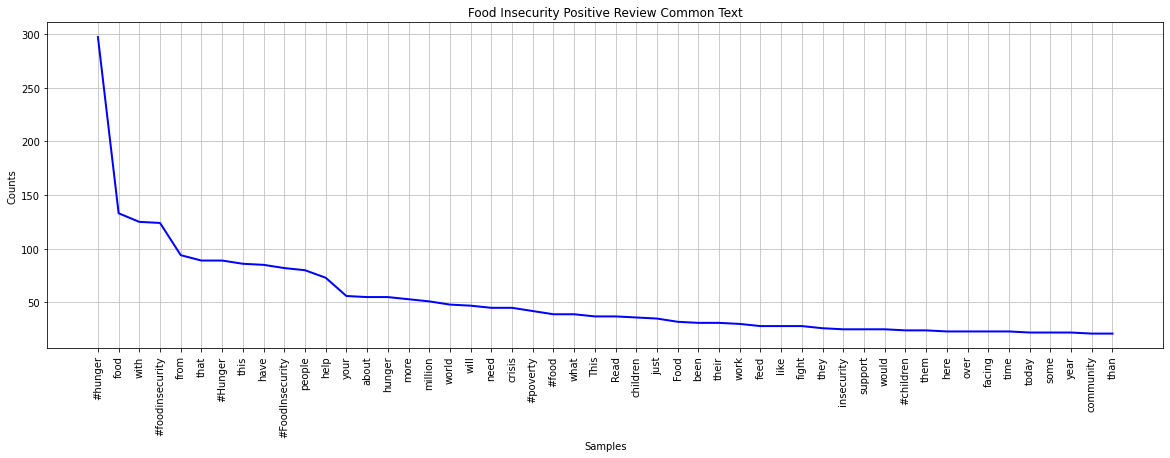

<Figure size 432x288 with 0 Axes>

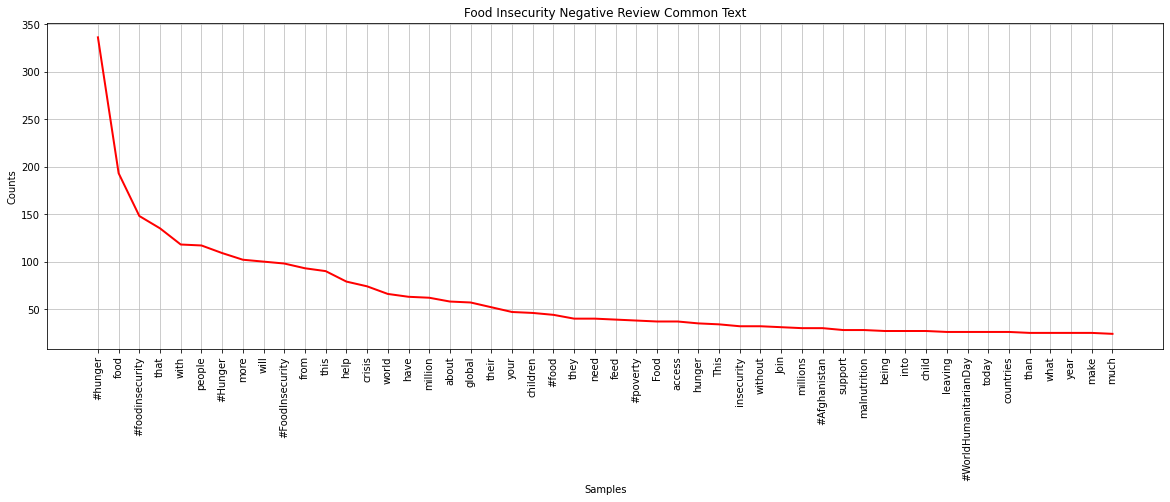

<Figure size 432x288 with 0 Axes>

In [25]:
view_common_words(food)

In [26]:
food['location'] = location

In [27]:
food

,text,label,location
0,Food elitism real harms income families Find m...,0.0,"Philadelphia, PA"
1,Food elitism real harms income families Find m...,1.0,USA
2,ship beans flour milk pasta veggies peanut but...,1.0,Southwind
3,ship beans flour milk pasta veggies peanut but...,1.0,NaN
4,neighbor used part tomatoes beautiful #fooddesert,1.0,"Delaware, OH"
...,...,...,...
1553,nothing oriole this point citizens getting the...,0.0,Salt Lake City
1554,excited about next reads #thewarofart #hunger ...,0.0,"Pasadena, CA"
1555,What address #hunger #Maryland Establishing ri...,1.0,USA
1556,White House #Hunger Conference centers people ...,0.0,"Richmond, CA"


In [28]:
p_food = food[food['label'] == 1.0]
n_food = food[food['label'] == 0.0]

In [29]:
p_food

,text,label,location
1,Food elitism real harms income families Find m...,1.0,USA
2,ship beans flour milk pasta veggies peanut but...,1.0,Southwind
3,ship beans flour milk pasta veggies peanut but...,1.0,NaN
4,neighbor used part tomatoes beautiful #fooddesert,1.0,"Delaware, OH"
5,Thank thank kind donor just sent pasta beans r...,1.0,"South Carolina, USA"
...,...,...,...
1550,drought #Hunger stones have been exposed #Euro...,1.0,NaN
1551,ICYMI CEOs call Australia #HelpFightFamine res...,1.0,Australia
1552,Good news making progress fight #hunger meet s...,1.0,the Garden State
1555,What address #hunger #Maryland Establishing ri...,1.0,USA


In [30]:
n_food

,text,label,location
0,Food elitism real harms income families Find m...,0.0,"Philadelphia, PA"
9,people hood will complain about living #Foodde...,0.0,SC
10,Does California still have strikes your rule t...,0.0,NaN
13,Only cont extra #FoodStamp benefits otherwise ...,0.0,"Winston-Salem, NC"
14,Thank Alex Ostensen Main Street Market Evansvi...,0.0,"Morrilton, AR"
...,...,...,...
1548,have reached consensus that basic human right ...,0.0,NaN
1549,expect rally #wheat good news people suffering...,0.0,Germany
1553,nothing oriole this point citizens getting the...,0.0,Salt Lake City
1554,excited about next reads #thewarofart #hunger ...,0.0,"Pasadena, CA"


In [31]:
p_locations = np.array(p_food['location'])
p_text = np.array(p_food['text'])
p_loc_clean = []
p_text_clean = []
for i in range(len(p_locations)):
    if type(p_locations[i]) == str:
        p_loc_clean.append(p_locations[i])
        p_text_clean.append(p_text[i])

n_locations = np.array(n_food['location'])
n_text = np.array(n_food['text'])
n_loc_clean = []
n_text_clean = []
for i in range(len(n_locations)):
    if type(n_locations[i]) == str:
        n_loc_clean.append(n_locations[i])
        n_text_clean.append(n_text[i])

In [32]:
p_food = pd.DataFrame({"text":p_text_clean, "location":p_loc_clean})
p_food

,text,location
0,Food elitism real harms income families Find m...,USA
1,ship beans flour milk pasta veggies peanut but...,Southwind
2,neighbor used part tomatoes beautiful #fooddesert,"Delaware, OH"
3,Thank thank kind donor just sent pasta beans r...,"South Carolina, USA"
4,people hood will complain about living #Foodde...,"Boston, MA"
...,...,...
554,Children #Afghanistan will from starvation unl...,United States
555,ICYMI CEOs call Australia #HelpFightFamine res...,Australia
556,Good news making progress fight #hunger meet s...,the Garden State
557,What address #hunger #Maryland Establishing ri...,USA


In [33]:
n_food = pd.DataFrame({"text":n_text_clean, "location":n_loc_clean})
n_food

,text,location
0,Food elitism real harms income families Find m...,"Philadelphia, PA"
1,people hood will complain about living #Foodde...,SC
2,Only cont extra #FoodStamp benefits otherwise ...,"Winston-Salem, NC"
3,Thank Alex Ostensen Main Street Market Evansvi...,"Morrilton, AR"
4,biggest risks upon entry homelessness starvati...,"Manhattan, NY"
...,...,...
656,White House #Hunger Conference centers people ...,"Seattle, WA"
657,expect rally #wheat good news people suffering...,Germany
658,nothing oriole this point citizens getting the...,Salt Lake City
659,excited about next reads #thewarofart #hunger ...,"Pasadena, CA"


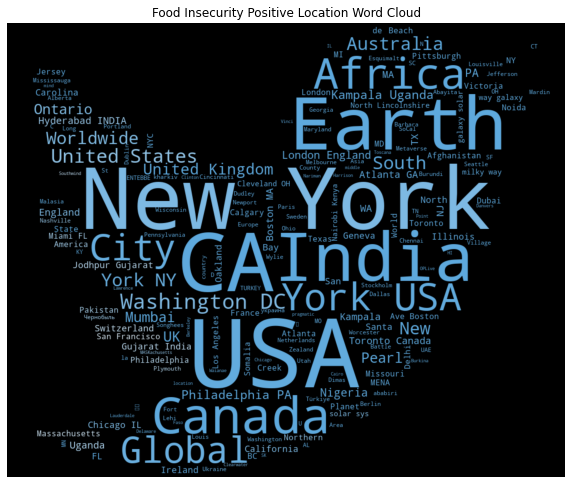

In [41]:
p_loc = ' '.join(text for text in p_food['location'])

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(p_loc)

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Food Insecurity Positive Location Word Cloud')
plt.axis('off')
plt.savefig('Positive_Locations.png')
plt.show()

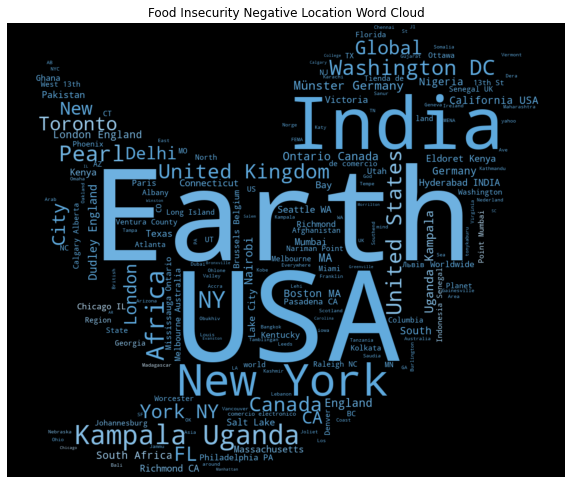

In [42]:
n_loc = ' '.join(text for text in n_food['location'])

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(n_loc)

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.title('Food Insecurity Negative Location Word Cloud')
plt.axis('off')
plt.savefig('Negative_Locations.png')
plt.show()

In [224]:
def plot_training(h, n_fold):
    # construct a plot that plots and saves the training history
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.linspace(1,4,4),h.history["loss"], label="train_loss")
    # plt.plot(H.history["val_loss"], label="val_loss")
    plt.plot(np.linspace(1,4,4),h.history["accuracy"], label="train_acc")
    # plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy (Fold {})".format(n_fold))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("Training_Loss_and_Accuracy_Fold_{}.png".format(n_fold))
    plt.show()

for i in range(10):
    plot_training(histories[i], i+1)

NameError: name 'histories' is not defined

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

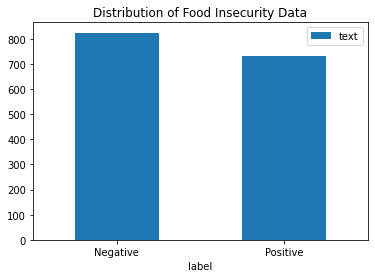

In [225]:
# Plotting the distribution for dataset.
ax = food[['text', 'label']].groupby('label').count().plot(kind='bar', title='Distribution of Food Insecurity Data',
                                               legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [111]:
'Vocabulary Size: 96224'

'Vocabulary Size: 96224'

In [101]:
A1 = np.array(model.get_weights(), dtype=object)
A2 = np.array(model.get_weights(), dtype=object)
type(A1), type(A2)

(numpy.ndarray, numpy.ndarray)

In [102]:
A3 = (A1+A2)/2
A3

array([array([[-0.026819  , -0.02646456, -0.04230513, ...,  0.02900248,
               -0.02935741, -0.00119347],
              [-0.00761772, -0.01899409,  0.03548208, ...,  0.0114071 ,
               -0.01289268, -0.04331719],
              [ 0.02286662,  0.00708636, -0.02169877, ...,  0.05935539,
               -0.02033115,  0.00906046],
              ...,
              [-0.03075782, -0.01046882,  0.04594683, ...,  0.00202579,
               -0.03559449,  0.02775653],
              [-0.00576421,  0.04124246, -0.00566129, ...,  0.01299417,
                0.04733025,  0.05020756],
              [-0.0120426 , -0.00473049,  0.02870206, ..., -0.03466656,
               -0.02923864, -0.00704513]], dtype=float32)              ,
       array([[ 0.14085743,  0.00473738,  0.10306404, ...,  0.1237313 ,
                0.05249352,  0.07378089],
              [-0.05378259,  0.18844278,  0.12442952, ..., -0.09847346,
                0.12294841,  0.24688885],
              [ 0.14690033,  0.1596534

In [104]:
from keras.models import Model

In [114]:
new_model, es, mc = build_BiLSTM(96224)
new_model.set_weights(A3)

In [ ]:
model.get